# pyGpuBM3D Demo

This notebook is a demo script for gpu-bm3d denoise method.

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../build/"))
import pyGpuBM3D

import numpy as np
import matplotlib.pyplot as plt

In [2]:
input = plt.imread("../lena_20.png")*255
input = input.astype(np.uint8)

Running GPU BM3D denoise...
Sigma 1st step = 3
1st step hard thresholding = 9
<<<<<<<<<<<<<<<<<<<< GPU BM3D Perf <<<<<<<<<<<<<<<<<<<<
Init takes 0.000834
First step takes 0.023455
Running GPU BM3D denoise...
Sigma 1st step = 3
Sigma 2nd step = 30
1st step hard thresholding = 9
<<<<<<<<<<<<<<<<<<<< GPU BM3D Perf <<<<<<<<<<<<<<<<<<<<
Init takes 0.000419
First step takes 0.023425
Second step takes 0.023872


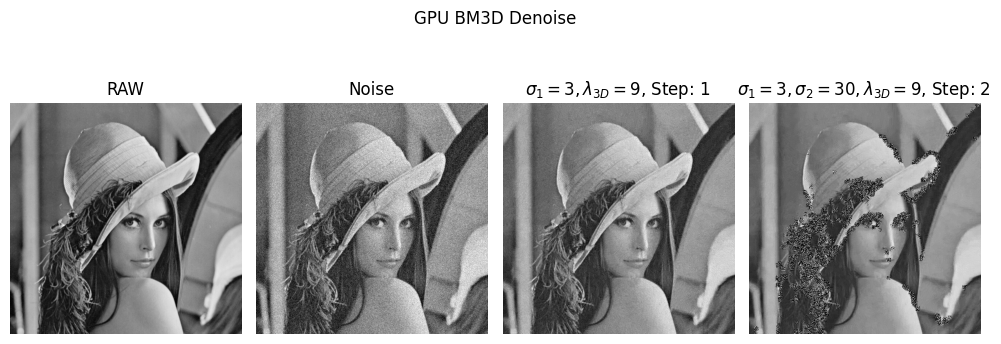

In [15]:
sigma_1 = 3
sigma_2 = 30
lambda_3d = 9
output1 = pyGpuBM3D.denoise(input,sigma_1,sigma_2, lambda_3d, 1, True)
output2 = pyGpuBM3D.denoise(input,sigma_1,sigma_2, lambda_3d, 2, True)

fig, axs = plt.subplots(1,4,figsize=(10,4))
fig.suptitle("GPU BM3D Denoise")

axs[0].imshow(plt.imread("../lena.png"),cmap="gray")
axs[0].set_axis_off()
axs[0].set_title("RAW")

axs[1].imshow(input,cmap="gray")
axs[1].set_axis_off()
axs[1].set_title("Noise")

axs[2].imshow(output1,cmap="gray",vmin=output1.min(),vmax=output1.max())
axs[2].set_axis_off()
axs[2].set_title(r'$\sigma_1=$' + str(sigma_1)+ r'$, \lambda_{3D}=$' + str(lambda_3d) + ", Step: 1")

axs[3].imshow(output2,cmap="gray",vmin=output2.min(),vmax=output2.max())
axs[3].set_axis_off()
axs[3].set_title(r'$\sigma_1=$' + str(sigma_1) + r'$, \sigma_2=$' + str(sigma_2) + r'$, \lambda_{3D}=$' + str(lambda_3d) + ", Step: 2")

fig.tight_layout()